# **Obtención de empresas y apellidos más importantes**

La idea del proyecto es disponibilizar una visualización que permita a los usuarios ver rápidamente apellidos y empresas en 2 casos:
- Apellidos que tengan muchas empresas relacionadas
- Apellidos que tengan una presencia muy alta en una empresa

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('../data/company_surname_count.csv')
df.head()

,Nombre_empresa,Apellido,conteo
0,AD RETAIL S.A.,ALVAREZ,1
1,AD RETAIL S.A.,BARBIERI,1
2,AD RETAIL S.A.,CARRERE,1
3,AD RETAIL S.A.,ESTEFAN,1
4,AD RETAIL S.A.,GONZALEZ,1


### **Caso 1**: Apellidos que tengan muchas empresas relacionadas

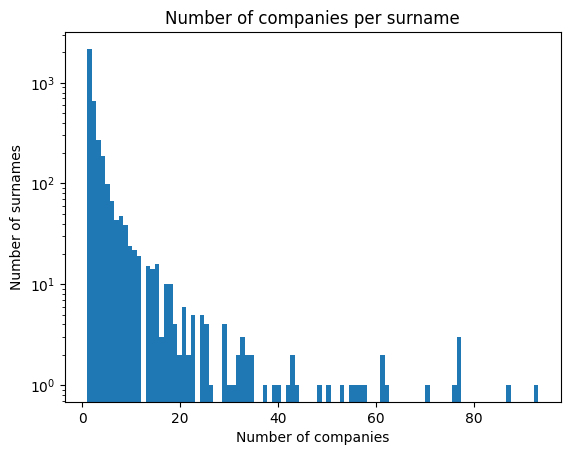

In [51]:
surnames_companies_count = df[["Nombre_empresa", "Apellido"]].groupby('Apellido').count().sort_values(by='Nombre_empresa', ascending=False)

plt.hist(surnames_companies_count['Nombre_empresa'], bins=100, log=True)
plt.xlabel('Number of companies')
plt.ylabel('Number of surnames')
plt.title('Number of companies per surname')
plt.show()

In [52]:
companies_count_threshold = 30
surnames_high_companies_count = surnames_companies_count[surnames_companies_count['Nombre_empresa'] > companies_count_threshold]

df_relevant_surnames_companies_count = df[df['Apellido'].isin(surnames_high_companies_count.index)]

print(f"Number of surnames with more than {companies_count_threshold} companies: {len(surnames_high_companies_count)}")
print(f"Number of (Company,Surname) with surnames with more than {companies_count_threshold} companies: {len(df_relevant_surnames_companies_count)}")

Number of surnames with more than 30 companies: 34
Number of (Company,Surname) with surnames with more than 30 companies: 1738


In [53]:
df_relevant_surnames_companies_count.head()

,Nombre_empresa,Apellido,conteo
0,AD RETAIL S.A.,ALVAREZ,1
4,AD RETAIL S.A.,GONZALEZ,1
13,AD RETAIL S.A.,SANCHEZ,1
18,AD RETAIL S.A.,VERGARA,1
23,ADMINISTRADORA DE FONDOS DE PENSIONES CAPITAL ...,CASTRO,1


### **Caso 2**: Apellidos que tengan una presencia muy alta en una empresa

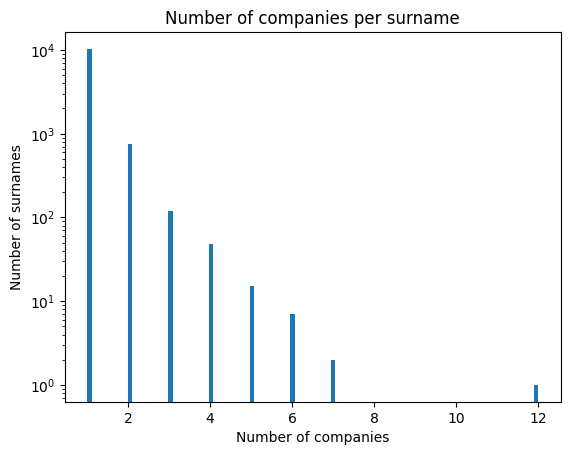

In [54]:
plt.hist(df['conteo'], bins=100, log=True)
plt.xlabel('Number of companies')
plt.ylabel('Number of surnames')
plt.title('Number of companies per surname')
plt.show()

In [55]:
surname_relevant_some_company = df[df['conteo'] >= 2]

print(f"Number of (Company,Surname) with surnames with more than 6 companies: {len(surname_relevant_some_company)}")

Number of (Company,Surname) with surnames with more than 6 companies: 937


In [56]:
surname_relevant_some_company.head()

,Nombre_empresa,Apellido,conteo
10,AD RETAIL S.A.,NEGRI,2
14,AD RETAIL S.A.,SANTA CRUZ,3
60,ADMINISTRADORA DE FONDOS DE PENSIONES CUPRUM S.A.,INFANTE,3
78,ADMINISTRADORA DE FONDOS DE PENSIONES HABITAT ...,BARROS,2
83,ADMINISTRADORA DE FONDOS DE PENSIONES HABITAT ...,COOPER,2


### **Juntando los casos 1 y 2**

Recordando que en nuestro dataset la llave es (Nombre_empresa, Apellido), podemos hacer un join entre los casos 1 y 2 para obtener una visualización que muestre los apellidos que tienen muchas empresas relacionadas y que además tengan una presencia muy alta en una empresa.

In [60]:
case_1 = df_relevant_surnames_companies_count.copy()
case_2 = surname_relevant_some_company.copy()

relevant_data = case_1.merge(case_2, on=['Nombre_empresa', 'Apellido'], how='inner')
relevant_data = relevant_data.drop(columns=['conteo_y'])
relevant_data = relevant_data.rename(columns={'conteo_x': 'conteo'})
relevant_data.head()

,Nombre_empresa,Apellido,conteo
0,ADMINISTRADORA DE FONDOS DE PENSIONES HABITAT ...,BARROS,2
1,ADMINISTRADORA DE FONDOS DE PENSIONES HABITAT ...,RODRIGUEZ,3
2,ADMINISTRADORA DE FONDOS DE PENSIONES HABITAT ...,VALDES,2
3,ADMINISTRADORA GENERAL DE FONDOS SECURITY S.A.,SILVA,2
4,ADMINISTRADORA GENERAL DE FONDOS VISION ADVISO...,GUZMAN,3


Guardamos el resultado en un archivo csv para poder visualizarlo en una visualización de datos.

In [63]:
relevant_data.to_csv('../data/relevant_directors_surnames.csv', index=False)